In [1]:
import pandas as pd

In [57]:
import statsmodels.formula.api as st
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [58]:
df1 = pd.read_csv('ss16pny.csv')

In [59]:
IV = ['WAGP','AGEP','SEX','RAC1P','HISP','SCHL','NATIVITY','CIT','SCIENGP','SCIENGRLP','MAR',
     'PAOC','FFERP','ESR','INDP']

In [60]:
df2 = df1[IV]

In [61]:
df2.SCIENGP[df2.SCIENGP == 1].value_counts().sum()

19315

In [62]:
df2.shape

(196104, 15)

In [63]:
df2 = df2[(df2['AGEP']>=25) & (df2.AGEP <=64)]

In [64]:
df2.shape

(102696, 15)

In [65]:
df2 = df2[(df2.RAC1P == 1) | (df2.RAC1P == 2) |(df2.RAC1P == 6) |(df2.RAC1P == 8)]

In [66]:
df2.shape

(100108, 15)

In [67]:
df2['white'] = 0
df2['black'] = 0
df2['asian'] = 0
df2['hispanic'] = 0

In [68]:
def white(s):
    if s == 1:
        return 1
    else:
        return 0
    
def black(s):
    if s == 2:
        return 1
    else:
        return 0

def asian(s):
    if s == 6:
        return 1
    else:
        return 0

def hisp(s):
    if s == 8:
        return 1
    else:
        return 0

In [69]:
df2['white'] = df2.RAC1P.apply(lambda x: white(x))
df2['black'] = df2.RAC1P.apply(lambda x: black(x))
df2['asian'] = df2.RAC1P.apply(lambda x: asian(x))
df2['hispanic'] = df2.RAC1P.apply(lambda x: hisp(x))

In [70]:
df2.shape

(100108, 19)

In [71]:
df2 = df2[df2.SCHL >=16]

In [72]:
df2.shape

(89452, 19)

In [73]:
df2['bachelor_below'] = 0
df2['bachelor'] = 0
df2['bachelor_above'] = 0

In [74]:
def bachelor_below(s):
    if s <21:
        return 1
    else:
        return 0
    
def bachelor(s):
    if s == 21 :
        return 1
    else:
        return 0

def bachelor_above(s):
    if s > 21:
        return 1
    else:
        return 0

In [75]:
df2['bachelor_below'] = df2.SCHL.apply(lambda x: bachelor_below(x))
df2['bachelor'] = df2.SCHL.apply(lambda x: bachelor(x))
df2['bachelor_above'] = df2.SCHL.apply(lambda x: bachelor_above(x))


In [76]:
df2.bachelor_below.sum()+df2.bachelor.sum()+df2.bachelor_above.sum()

89452

In [77]:
def gender(s):
    if s == 2 :
        return 0
    else:
        return 1

In [78]:
df2['SEX'] = df2.SEX.apply(lambda x: gender(x))

In [80]:
df2.SEX.value_counts().sum()

89452

In [81]:
def nativity(s):
    if s == 1 :
        return 0
    else:
        return 1

In [82]:
df2['NATIVITY'] = df2.NATIVITY.apply(lambda x: nativity(x))

In [85]:
df2.NATIVITY.value_counts().sum()

89452

In [87]:
def citizenship(s):
    if s < 5 :
        return 1
    else:
        return 0

In [88]:
df2['CIT'] = df2.CIT.apply(lambda x: citizenship(x))

In [90]:
df2.CIT.value_counts().sum()

89452

In [91]:
df2.MAR.value_counts()

1    51721
5    24991
3     8959
4     2274
2     1507
Name: MAR, dtype: int64

In [92]:
def marital_status(s):
    if s == 1 :
        return 1
    else:
        return 0

In [93]:
df2['MAR'] = df2.MAR.apply(lambda x: marital_status(x))

In [95]:
df2.MAR.value_counts().sum()

89452

In [103]:
df2 = df2[df2.ESR !=6]

In [104]:
df2.shape

(71206, 22)

In [105]:
def employment_status(s):
    if s == 3 :
        return 0
    else:
        return 1

In [106]:
df2['ESR'] = df2.ESR.apply(lambda x: employment_status(x))

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
df2.ESR.value_counts().sum()

71206

In [110]:
df2.to_csv('df2.csv')

## Saving point 1

In [137]:
df3 = pd.read_csv('df2.csv')

In [138]:
df3.shape

(71206, 23)

In [139]:
del df3['Unnamed: 0']

In [140]:
len(df3[(df3.INDP>= 7270) & (df3.INDP <= 7790)])

8659

In [141]:
len(df3[(df3.INDP>= 6470) & (df3.INDP <= 6780)])

2194

In [142]:
df3 = df3[((df3.INDP>=1070) & (df3.INDP<=3990)) | ((df3.INDP>=6470) & (df3.INDP<=8290)) | ((df3.INDP>=9370) & (df3.INDP<=9590))]

In [136]:
df3.to_csv('df3.csv')

AttributeError: 'tuple' object has no attribute 'to_csv'

## Saving point 2

In [2]:
df4 = pd.read_csv('df3.csv')

In [3]:
df4.shape

(44441, 23)

In [31]:
def FIN(s):
    if (s>= 6870 and s<=7190):
        return 1
    else:
        return 0
    
def EDU(s):
    if (s>= 7860 and s<=7890):
        return 1
    else:
        return 0

def MED(s):
    if (s>= 7970 and s<=8290):
        return 1
    else:
        return 0

def PRF(s):
    if (s>= 7270 and s<=7790):
        return 1
    else:
        return 0

def MFG(s):
    if (s>= 1070 and s<=3990):
        return 1
    else:
        return 0

def INF(s):
    if (s>= 6470 and s<=6780):
        return 1
    else:
        return 0

def ADM(s):
    if (s>= 9370 and s<=9590):
        return 1
    else:
        return 0

In [35]:
df4['FIN'] = 0
df4['EDU'] = 0
df4['MED'] = 0
df4['PRF'] = 0
df4['MFG'] = 0
df4['INF'] = 0
df4['ADM'] = 0

In [36]:
df4['FIN'] = df4.INDP.apply(lambda x: FIN(x))
df4['EDU'] = df4.INDP.apply(lambda x: EDU(x))
df4['MED'] = df4.INDP.apply(lambda x: MED(x))
df4['PRF'] = df4.INDP.apply(lambda x: PRF(x))
df4['MFG'] = df4.INDP.apply(lambda x: MFG(x))
df4['INF'] = df4.INDP.apply(lambda x: INF(x))
df4['ADM'] = df4.INDP.apply(lambda x: ADM(x))

In [45]:
df4.ADM.value_counts()

0    40419
1     4022
Name: ADM, dtype: int64

In [46]:
df4.to_csv('df4.csv')

## Saving point 3

In [47]:
df5 = pd.read_csv('df4.csv')

In [48]:
df5.shape

(44441, 31)

In [49]:
df5.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'WAGP', 'AGEP', 'SEX', 'RAC1P', 'HISP',
       'SCHL', 'NATIVITY', 'CIT', 'SCIENGP', 'SCIENGRLP', 'MAR', 'PAOC',
       'FFERP', 'ESR', 'INDP', 'white', 'black', 'asian', 'hispanic',
       'bachelor_below', 'bachelor', 'bachelor_above', 'FIN', 'EDU', 'MED',
       'PRF', 'MFG', 'INF', 'ADM'],
      dtype='object')

In [51]:
df6 = df5.drop(['Unnamed: 0', 'Unnamed: 0.1', 'RAC1P', 'HISP',
     'SCHL', 'SCIENGP', 'SCIENGRLP', 'PAOC', 'INDP'],axis =1)

In [52]:
df6.columns

Index(['WAGP', 'AGEP', 'SEX', 'NATIVITY', 'CIT', 'MAR', 'FFERP', 'ESR',
       'white', 'black', 'asian', 'hispanic', 'bachelor_below', 'bachelor',
       'bachelor_above', 'FIN', 'EDU', 'MED', 'PRF', 'MFG', 'INF', 'ADM'],
      dtype='object')

In [53]:
df6.shape

(44441, 22)

In [54]:
df6.to_csv('df6.csv')

##  Saving Point 4

In [55]:
df7 = pd.read_csv('df6.csv')

In [60]:
del df7['Unnamed: 0']

In [61]:
col = df7.columns

In [62]:
col

Index(['WAGP', 'AGEP', 'SEX', 'NATIVITY', 'CIT', 'MAR', 'FFERP', 'ESR',
       'white', 'black', 'asian', 'hispanic', 'bachelor_below', 'bachelor',
       'bachelor_above', 'FIN', 'EDU', 'MED', 'PRF', 'MFG', 'INF', 'ADM'],
      dtype='object')

In [118]:
model = col[0] + "~"

In [119]:
for i in range(2,len(col)):
    model = model + "C("+ col[i] +")+ "

In [91]:
model = model[:154]

In [120]:
model

'WAGP~C(SEX)+ C(NATIVITY)+ C(CIT)+ C(MAR)+ C(FFERP)+ C(ESR)+ C(white)+ C(black)+ C(asian)+ C(hispanic)+ C(bachelor_below)+ C(bachelor)+ C(bachelor_above)+ C(FIN)+ C(EDU)+ C(MED)+ C(PRF)+ C(MFG)+ C(INF)+ C(ADM)+ '

In [137]:
lm = st.ols('WAGP~AGEP+ C(SEX)+ C(CIT)+ C(MAR)+ C(FFERP)+ C(white)+ C(black)+\
            C(asian)+ C(hispanic)+ C(bachelor_below)+ C(bachelor)+ C(bachelor_above)+ C(FIN)+ C(EDU)+\
            C(MED)+ C(PRF)+ C(MFG)+ C(ADM) + C(INF)',data=df7).fit()

In [138]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WAGP   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     601.2
Date:                Fri, 08 Dec 2017   Prob (F-statistic):               0.00
Time:                        22:04:43   Log-Likelihood:            -5.6496e+05
No. Observations:               44441   AIC:                         1.130e+06
Df Residuals:                   44424   BIC:                         1.130e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.115e+04   1254.560      8.891      0.000    8695.418    1.36e+04
C(SEX)[T.1]             2.866e+04    817.100     35.072      0.000    2.71e+04    3.03e+04
C(CIT)[T.1]             4598.7888   1612.402      2.852      0.004    1438.453    7759.125
C(MAR)[T.1]             1.413e+04    818.828     17.260      0.000    1.25e+04    1.57e+04
C(FFERP)[T.1]           3787.2173   2434.894      1.555      0.120    -985.218    8559.653
C(white)[T.1]           8216.5267    822.969      9.984      0.000    6603.494    9829.560
C(black)[T.1]            106.5553   1089.974      0.098      0.922   -2029.814    2242.924
C(asian)[T.1]           6209.9837   1189.077      5.223      0.000    3879.371    8540.596
C(hispanic)[T.1]       -3378.6880   1688.280     -2.001      0.045   -6687.747     -69.629
C(bachelor_below)[T.1] -3.031e+04    701.159    -43.225      0.000   -3.17e+04   -2.89e+04
C(bachelor)[T.1]        4634.9737    695.739      6.662      0.000    3271.313    5998.634
C(bachelor_above)[T.1]  3.683e+04    741.895     49.639      0.000    3.54e+04    3.83e+04
C(FIN)[T.1]             3.621e+04    989.127     36.608      0.000    3.43e+04    3.81e+04
C(EDU)[T.1]            -2.822e+04    906.282    -31.141      0.000      -3e+04   -2.64e+04
C(MED)[T.1]             -527.8919    844.473     -0.625      0.532   -2183.075    1127.291
C(PRF)[T.1]              401.8558    853.546      0.471      0.638   -1271.109    2074.821
C(MFG)[T.1]            -4399.9305   1112.581     -3.955      0.000   -6580.609   -2219.252
C(ADM)[T.1]             -820.6986   1185.628     -0.692      0.489   -3144.550    1503.152
C(INF)[T.1]             8513.7573   1541.845      5.522      0.000    5491.714    1.15e+04
AGEP                     709.4746     35.821     19.806      0.000     639.265     779.684
==============================================================================
Omnibus:                    35386.155   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           841292.150
Skew:                           3.758   Prob(JB):                         0.00
Kurtosis:                      22.946   Cond. No.                     1.55e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.92e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [140]:
df7['race'] = 0 

In [150]:
def race(s):
    if s == 1:
        return 0
    elif s == 2:
        return 'Black'
    elif s == 6:
        return 'Asian'
    elif s == 8:
        return 'Hispanic'

In [151]:
df7['race'] = df5.RAC1P.apply(lambda x:race(x))

In [152]:
lm2 = st.ols('WAGP~AGEP+ C(SEX)+ C(CIT)+ C(MAR)+ C(FFERP)+C(race)+\
           C(bachelor_below)+ C(bachelor)+ C(bachelor_above)+ C(FIN)+ C(EDU)+\
            C(MED)+ C(PRF)+ C(MFG)+ C(ADM) + C(INF)',data=df7).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WAGP   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     601.2
Date:                Fri, 08 Dec 2017   Prob (F-statistic):               0.00
Time:                        22:19:20   Log-Likelihood:            -5.6496e+05
No. Observations:               44441   AIC:                         1.130e+06
Df Residuals:                   44424   BIC:                         1.130e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.672e+04   1532.974     10.907      0.000    1.37e+04    1.97e+04
C(SEX)[T.1]             2.866e+04    817.100     35.072      0.000    2.71e+04    3.03e+04
C(CIT)[T.1]             4598.7888   1612.402      2.852      0.004    1438.453    7759.125
C(MAR)[T.1]             1.413e+04    818.828     17.260      0.000    1.25e+04    1.57e+04
C(FFERP)[T.1]           3787.2173   2434.894      1.555      0.120    -985.218    8559.653
C(race)[T.Asian]       -2006.5429   1440.821     -1.393      0.164   -4830.577     817.491
C(race)[T.Black]       -8109.9713   1223.439     -6.629      0.000   -1.05e+04   -5712.010
C(race)[T.Hispanic]     -1.16e+04   2139.861     -5.419      0.000   -1.58e+04   -7401.049
C(bachelor_below)[T.1] -2.845e+04    769.335    -36.982      0.000      -3e+04   -2.69e+04
C(bachelor)[T.1]        6490.3184    751.810      8.633      0.000    5016.759    7963.878
C(bachelor_above)[T.1]  3.868e+04    792.267     48.825      0.000    3.71e+04    4.02e+04
C(FIN)[T.1]             3.701e+04    998.869     37.047      0.000     3.5e+04     3.9e+04
C(EDU)[T.1]            -2.743e+04    911.275    -30.098      0.000   -2.92e+04   -2.56e+04
C(MED)[T.1]              267.2559    857.324      0.312      0.755   -1413.114    1947.626
C(PRF)[T.1]             1197.0036    859.857      1.392      0.164    -488.331    2882.338
C(MFG)[T.1]            -3604.7827   1118.101     -3.224      0.001   -5796.281   -1413.285
C(ADM)[T.1]              -25.5509   1194.679     -0.021      0.983   -2367.143    2316.041
C(INF)[T.1]             9308.9051   1546.989      6.017      0.000    6276.780    1.23e+04
AGEP                     709.4746     35.821     19.806      0.000     639.265     779.684
==============================================================================
Omnibus:                    35386.155   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           841292.150
Skew:                           3.758   Prob(JB):                         0.00
Kurtosis:                      22.946   Cond. No.                     1.10e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.85e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [164]:
df7['Educ'] = 0

In [165]:
def education(s):
    if s < 21:
        return 0
    elif s == 21:
        return 'Bachelor'
    elif s > 21:
        return 'Master'

In [166]:
df7['Educ'] = df5.SCHL.apply(lambda x:education(x))

In [167]:
lm3 = st.ols('WAGP~AGEP+ C(SEX)+ C(CIT)+ C(MAR)+ C(FFERP)+C(race)+\
          C(Educ) + C(FIN)+ C(EDU)+\
            C(MED)+ C(PRF)+ C(MFG)+ C(ADM) + C(INF)',data=df7).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WAGP   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     601.2
Date:                Fri, 08 Dec 2017   Prob (F-statistic):               0.00
Time:                        22:30:58   Log-Likelihood:            -5.6496e+05
No. Observations:               44441   AIC:                         1.130e+06
Df Residuals:                   44424   BIC:                         1.130e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -8175.0375   2063.986     -3.961      0.000   -1.22e+04   -4129.589
C(SEX)[T.1]          2.866e+04    817.100     35.072      0.000    2.71e+04    3.03e+04
C(CIT)[T.1]          4598.7888   1612.402      2.852      0.004    1438.453    7759.125
C(MAR)[T.1]          1.413e+04    818.828     17.260      0.000    1.25e+04    1.57e+04
C(FFERP)[T.1]        3787.2173   2434.894      1.555      0.120    -985.218    8559.653
C(race)[T.Asian]    -2006.5429   1440.821     -1.393      0.164   -4830.577     817.491
C(race)[T.Black]    -8109.9713   1223.439     -6.629      0.000   -1.05e+04   -5712.010
C(race)[T.Hispanic]  -1.16e+04   2139.861     -5.419      0.000   -1.58e+04   -7401.049
C(Educ)[T.Bachelor]  3.494e+04    953.143     36.660      0.000    3.31e+04    3.68e+04
C(Educ)[T.Master]    6.713e+04    993.444     67.577      0.000    6.52e+04    6.91e+04
C(FIN)[T.1]          3.345e+04   1019.849     32.798      0.000    3.14e+04    3.54e+04
C(EDU)[T.1]         -3.098e+04    939.528    -32.978      0.000   -3.28e+04   -2.91e+04
C(MED)[T.1]         -3289.2369    871.230     -3.775      0.000   -4996.862   -1581.612
C(PRF)[T.1]         -2359.4892    879.968     -2.681      0.007   -4084.242    -634.736
C(MFG)[T.1]         -7161.2755   1127.623     -6.351      0.000   -9371.436   -4951.116
C(ADM)[T.1]         -3582.0437   1210.734     -2.959      0.003   -5955.103   -1208.985
C(INF)[T.1]          5752.4123   1566.003      3.673      0.000    2683.020    8821.805
AGEP                  709.4746     35.821     19.806      0.000     639.265     779.684
==============================================================================
Omnibus:                    35386.155   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           841292.150
Skew:                           3.758   Prob(JB):                         0.00
Kurtosis:                      22.946   Cond. No.                     2.49e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.53e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [184]:
index=[0]

In [170]:
race_values = [0, 'Asian', 'Black', 'Hispanic']

In [175]:
income_mean_by_race = {}

In [176]:
for i in race_values:
    income_mean_by_race[i] = df7[df7['race'] == i].WAGP.mean()

In [177]:
income_mean_by_race

{0: 76176.87542525811,
 'Asian': 85907.70148462354,
 'Black': 51919.94580452252,
 'Hispanic': 45563.35313531353}

In [198]:
race_income_df = pd.DataFrame.from_dict(income_mean_by_race, orient='index')

In [206]:
race_income_df = race_income_df.rename_axis({0:'White'}, axis=0)

In [200]:
race_income_df = race_income_df.rename(columns={0:'Average_Income'})

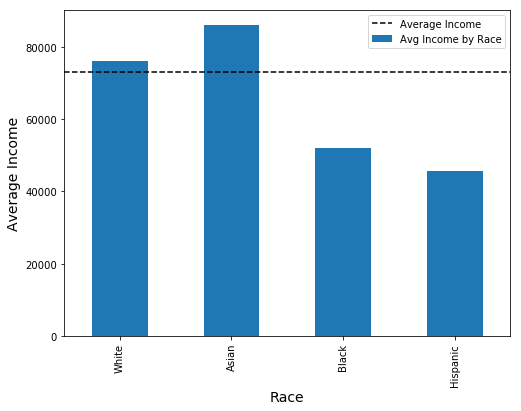

In [252]:
pl.figure(figsize=(8,6))
race_income_df['Average_Income'].plot(kind='bar', label='Avg Income by Race')
pl.axhline(y= df7.WAGP.mean(),c='black',linestyle='--', label='Average Income')
pl.xlabel('Race', fontsize=14)
pl.ylabel('Average Income', fontsize=14)
pl.legend()

In [209]:
df7[df7.SEX == 0].WAGP.mean()

57903.07877945026

In [210]:
income_mean_by_gender = {'Male': df7[df7.SEX == 1].WAGP.mean(), 'Female':df7[df7.SEX == 0].WAGP.mean()}

In [211]:
gender_income_df = pd.DataFrame.from_dict(income_mean_by_gender, orient='index')

In [215]:
gender_income_df = gender_income_df.rename(columns={0:'Average_Income'})

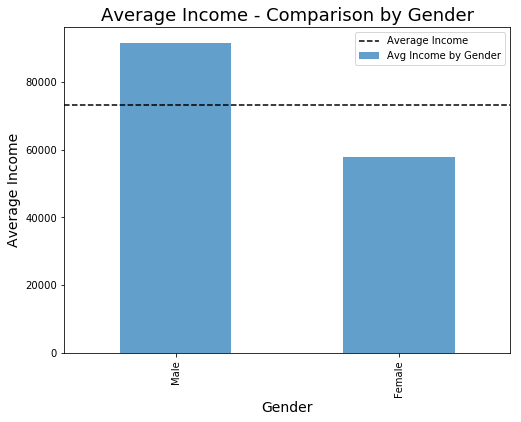

In [255]:
ax, fig = pl.subplots(figsize=(8,6))
gender_income_df['Average_Income'].plot(kind='bar', alpha=0.7, label='Avg Income by Gender')
pl.axhline(y= df7.WAGP.mean(),c='black',linestyle='--', label='Average Income')
pl.xlabel('Gender', fontsize=14)
pl.ylabel('Average Income', fontsize=14)
pl.title('Average Income - Comparison by Gender',fontsize=18)
pl.legend()

In [225]:
income_mean_by_citizenship = {'US Citizen': df7[df7.CIT == 1].WAGP.mean(), 'Not US Citizen':df7[df7.CIT == 0].WAGP.mean()}

In [226]:
citizenship_income_df = pd.DataFrame.from_dict(income_mean_by_citizenship, orient='index')

In [227]:
citizenship_income_df = citizenship_income_df.rename(columns={0:'Average_Income'})

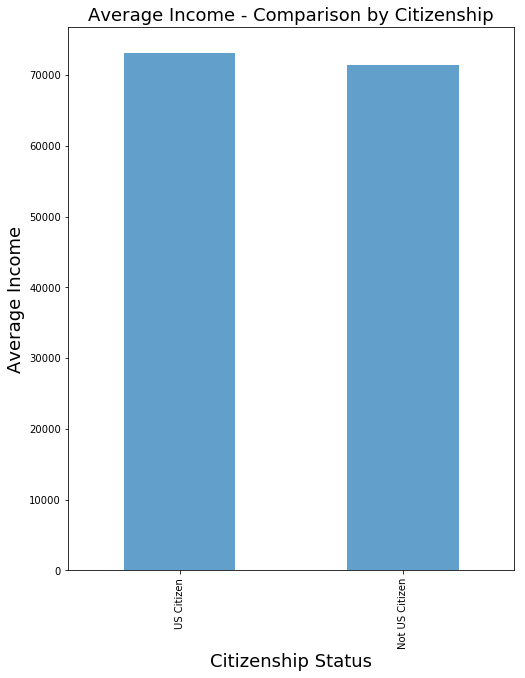

In [229]:
ax, fig = pl.subplots(figsize=(8,10))
citizenship_income_df['Average_Income'].plot(kind='bar', alpha=0.7)
pl.xlabel('Citizenship Status', fontsize=18)
pl.ylabel('Average Income', fontsize=18)
pl.title('Average Income - Comparison by Citizenship',fontsize=18)

In [234]:
pl.axhline?